In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import (Ridge, Lasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [43]:
np.random.seed(2023 - 5 - 9)

crime = pd.read_table("../resources/assets/CommViolPredUnnormalizedData.txt", sep = ",", na_values = "?")
# remove features with poor coverage or lower relevance, and keep ViolentCrimesPerPop target column
columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]  
crime = crime.iloc[:,columns_to_keep].dropna()

x_crime = crime.iloc[:,range(0,88)]
y_crime = crime['ViolentCrimesPerPop']

train_x, test_x, train_y, test_y = train_test_split(x_crime, y_crime, train_size = 0.85)

mmscaler = MinMaxScaler().fit(train_x)
scaled_trainx = mmscaler.transform(train_x)
scaled_testx = mmscaler.transform(test_x)

# ___Linear Regression: Ridge, Lasso and Polynomial Regression___
------------

# ___Ridge Regression___
----------

In [46]:
# Ridge regression is similar to Simple linear regression, but adds a penalty to feature weights that are too large.
# This penalty is called L2 penalty.
# Large weights mean that the sum of their squared values is large.
# Once Ridge regression has estimated the w and b parameters, prediction of y value is identical to simple linear regression.

In [47]:
# So when does the penalty of larger weights prove useful?
# Addition of a penalty parameter to a learning algorithm's function is called REGULARIZATION.
# Regularization helps prevent overfitting by restricting the model from giving disproportionately higher priority to features with 
# higher weights and thus helps reduce complexity.

In [48]:
# If Ridge regression finds two models that predict equally well, it'll prefer the one that has the smallest sum of 
# squared feature weights.
# The application of ridge regression is to find feature weights w_i, fit the data well and set the feature weights to very small values.
# This is fairly inconsequential in single feature linear regression but very rigorous in models with hundreds of features.

# ___$RSS_{ridge}(w, b)~=~\sum_{i = 1}^{N}{(y_i - (w \cdot x_i + b))^2}~+~\alpha~\sum_{j = 1}^{P}{w_j^2}$___

In [49]:
# The amount of regularization is regulated by the alpha parameter.
# Larger alpha means more regularization & simpler linear models with weights closer to 0.
# The default value for alpha is 1.0

# Setting alpha = 0 makes the Ridge regression;

# ___$RSS_{ridge}(w, b)~=~\sum_{i = 1}^{N}{(y_i - (w \cdot x_i + b))^2}~+~0$___

In [50]:
# equivalent to ordinary least squares regression.

In [51]:
linRidge = Ridge(alpha = 87.98).fit(train_x, train_y)

In [52]:
# we have 10 features, and consequently 10 weights.
linRidge.coef_

array([-6.60084497e-04,  3.53589022e+00,  9.16851521e+00, -3.56582449e+01,
        9.99640571e+00, -1.39330648e+01, -8.16782025e-05,  1.30630173e+00,
       -8.81188208e-03, -7.71485452e+00,  1.36243077e+01, -8.17064112e+00,
        6.86523931e+00,  5.19807833e+00, -8.10027286e+00,  7.79608383e-03,
       -7.97427381e-04,  1.45764865e-03, -7.94065850e+00, -1.52084542e+01,
        5.28797145e+00,  3.39123888e+00,  5.14827384e+00,  1.03045599e+01,
       -2.63168369e+00, -1.78508334e-01, -5.50971976e-01,  2.28959735e+00,
        3.70260655e+01,  1.00891822e+01, -1.90689956e+01, -1.23924416e+01,
        3.40763238e+00,  1.18699926e+01, -2.25486014e+01,  1.70742503e+00,
       -6.23605343e-02,  1.84261431e+00, -7.29838077e+00, -9.70091944e-03,
        6.31426623e+01,  1.45691483e-03,  8.90503519e-01, -1.07138633e+00,
       -3.90449376e-01,  1.46929372e+00, -1.05527168e+01, -2.65735077e+00,
       -7.10969247e+00, -4.39027959e+00,  1.38130022e+00, -2.20333508e+01,
        6.28169592e+00, -

In [53]:
linRidge.intercept_

-1650.6571292595556

In [54]:
linRidge.score(train_x, train_y)

0.658047206497478

In [55]:
linRidge.score(test_x, test_y)

0.6776183247569071

In [57]:
# However these scores are not impressive.

## ___Feature preprocessing & normalization to improve Ridge regression performance___
------------

In [58]:
# In ridge regression the effect of increasing alpha is to shrink the feature weight close to 0.0
# But when the dataset has input variables (features) on different scales, they will contribute differently to the penalty.
# Because the penalty is the sum of squares of all feature weights.

In [59]:
# Transforming the features to a common scale will help prevent the unduly weighting of certain features due to their scale.
# e.g. we have dataset of used cars, a feature is manufactures year, which will be in the range 1990 - 2023
# and another feature is mileage, this can range from 0 to 1,000,000 or more
# So, these two features are in very different scales.

In [60]:
# The influence of such disparities can be countered by normalization.

In [61]:
# Feature normalization is important to many ML algorithms, beyond the Ridge regression.

## ___MinMax Scaling___
-----------

In [62]:
# For each feature x, computes the minimum and maximum.
# And transforms the feature value to a scaled version using the following formula,

# ___$x_i'~=~\frac{x_i - x_{min}}{x_{max} - x_{min}}$___

In [63]:
x = np.random.randint(100, 150, 10)
x

array([104, 129, 100, 124, 142, 123, 140, 133, 144, 121])

In [65]:
# min max scaled x;

(x - x.min()) / (x.max() - x.min())

array([0.09090909, 0.65909091, 0.        , 0.54545455, 0.95454545,
       0.52272727, 0.90909091, 0.75      , 1.        , 0.47727273])

In [2]:
x = np.random.randint(10, 15, 10)
y = np.random.randint(250, 300, 10)

x_scaled = (x - x.min()) / (x.max() - x.min())
y_scaled = (y - y.min()) / (y.max() - y.min())

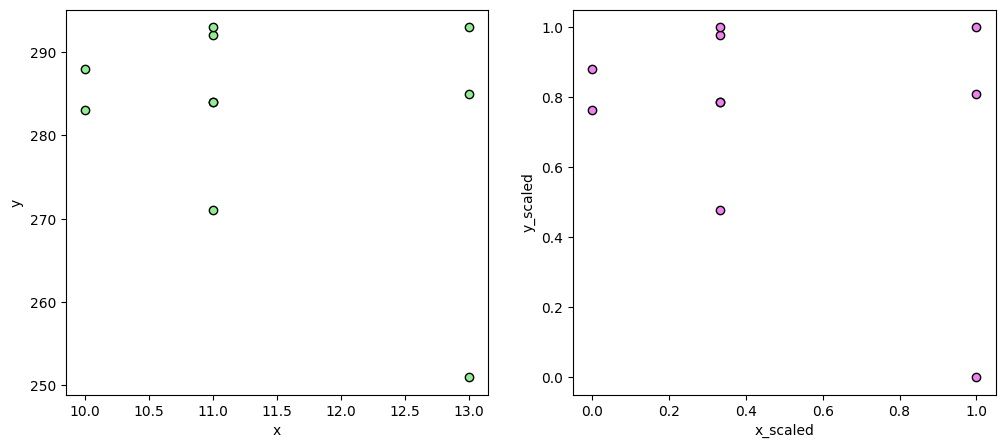

In [5]:
fig, (axes0, axes1) = plt.subplots(ncols = 2)
fig.set_size_inches(12, 5)

axes0.scatter(x, y, color = "lightgreen", edgecolor = "black")
axes0.set_xlabel("x")
axes0.set_ylabel("y")
axes1.scatter(x_scaled, y_scaled, color = "violet", edgecolor = "black")
axes1.set_xlabel("x_scaled")
axes1.set_ylabel("y_scaled")
plt.show()

In [80]:
# Look at the scales.
# In MinMax scaling the lowest value gets mapped to 0 and the highest value gets mapped to 1.
# So the order or distribution is preserved albeit the values getting modified.

In [81]:
minmax = MinMaxScaler().fit(train_x)

In [83]:
trainx_scaled = minmax.transform(train_x)
testx_scaled = minmax.transform(test_x)

In [84]:
linRidge = Ridge(alpha = 10.00).fit(trainx_scaled, train_y)

In [86]:
# R2 score

linRidge.score(testx_scaled, test_y)

0.6526612001133569

In [ ]:
# Cautions on applying the minmax scalar:
    # The same scalar should be used to scale the train_x and the test_x
    # The scalar must be trained using the train_x not the test_x
    # Targets are not scaled.

In [15]:
x = np.random.randint(0, 10, 100).reshape(-1, 1)

In [16]:
# Now we have a scaler that has fitted the data.
# i.e it has learned the min and max values of the passed array.
minmax = MinMaxScaler().fit(x)

In [17]:
# Next step is normalization.
minmax.transform(x).ravel()

array([0.66666667, 0.66666667, 0.66666667, 1.        , 1.        ,
       0.77777778, 0.66666667, 0.33333333, 0.88888889, 0.88888889,
       0.88888889, 1.        , 0.66666667, 0.        , 0.22222222,
       1.        , 0.88888889, 0.44444444, 0.44444444, 0.11111111,
       0.44444444, 0.66666667, 0.33333333, 0.55555556, 0.66666667,
       0.88888889, 0.33333333, 0.44444444, 1.        , 0.22222222,
       0.44444444, 0.44444444, 0.66666667, 0.88888889, 0.55555556,
       0.44444444, 0.77777778, 0.55555556, 0.        , 0.11111111,
       1.        , 0.55555556, 0.        , 0.77777778, 0.44444444,
       0.55555556, 1.        , 1.        , 1.        , 0.11111111,
       0.77777778, 0.88888889, 0.11111111, 0.55555556, 0.55555556,
       0.        , 0.11111111, 1.        , 0.44444444, 0.33333333,
       0.22222222, 0.22222222, 0.11111111, 0.55555556, 1.        ,
       0.88888889, 0.22222222, 0.        , 0.        , 0.66666667,
       0.66666667, 0.        , 1.        , 0.77777778, 0.33333

In [20]:
# See, the above and below are identical.
((x - x.min()) / (x.max() - x.min())).ravel()

array([0.66666667, 0.66666667, 0.66666667, 1.        , 1.        ,
       0.77777778, 0.66666667, 0.33333333, 0.88888889, 0.88888889,
       0.88888889, 1.        , 0.66666667, 0.        , 0.22222222,
       1.        , 0.88888889, 0.44444444, 0.44444444, 0.11111111,
       0.44444444, 0.66666667, 0.33333333, 0.55555556, 0.66666667,
       0.88888889, 0.33333333, 0.44444444, 1.        , 0.22222222,
       0.44444444, 0.44444444, 0.66666667, 0.88888889, 0.55555556,
       0.44444444, 0.77777778, 0.55555556, 0.        , 0.11111111,
       1.        , 0.55555556, 0.        , 0.77777778, 0.44444444,
       0.55555556, 1.        , 1.        , 1.        , 0.11111111,
       0.77777778, 0.88888889, 0.11111111, 0.55555556, 0.55555556,
       0.        , 0.11111111, 1.        , 0.44444444, 0.33333333,
       0.22222222, 0.22222222, 0.11111111, 0.55555556, 1.        ,
       0.88888889, 0.22222222, 0.        , 0.        , 0.66666667,
       0.66666667, 0.        , 1.        , 0.77777778, 0.33333

In [22]:
# Instead of fitting and transforming in two steps, we could use the fit_transform() method.
MinMaxScaler().fit_transform(x).ravel()

array([0.66666667, 0.66666667, 0.66666667, 1.        , 1.        ,
       0.77777778, 0.66666667, 0.33333333, 0.88888889, 0.88888889,
       0.88888889, 1.        , 0.66666667, 0.        , 0.22222222,
       1.        , 0.88888889, 0.44444444, 0.44444444, 0.11111111,
       0.44444444, 0.66666667, 0.33333333, 0.55555556, 0.66666667,
       0.88888889, 0.33333333, 0.44444444, 1.        , 0.22222222,
       0.44444444, 0.44444444, 0.66666667, 0.88888889, 0.55555556,
       0.44444444, 0.77777778, 0.55555556, 0.        , 0.11111111,
       1.        , 0.55555556, 0.        , 0.77777778, 0.44444444,
       0.55555556, 1.        , 1.        , 1.        , 0.11111111,
       0.77777778, 0.88888889, 0.11111111, 0.55555556, 0.55555556,
       0.        , 0.11111111, 1.        , 0.44444444, 0.33333333,
       0.22222222, 0.22222222, 0.11111111, 0.55555556, 1.        ,
       0.88888889, 0.22222222, 0.        , 0.        , 0.66666667,
       0.66666667, 0.        , 1.        , 0.77777778, 0.33333

In [23]:
# If we normalize the training set and test set using different scalers, we'll end up with more/less randomly skewed data,
# which will invalidate our predictions.

# Fitting the scaler on the test data will lead to data leakage. Where the training phase has information about the test set that is 
# leaked during the fitting process. Models that had the chance of exposure to test sets in the learning process may perform exceptionally
# well given the test set, but may fail to generalize when provided with new, unseen datasets.

# Learned parameters of models created using scaled training sets may not clearly reflect the nature of the training data. 

In [24]:
# Regularization works well when we have relatively small amounts of training data.
# But becomes less important when the training data is large.

## ___Effect of Different Magnitudes of Regularization in Model Performance___
---------------

In [87]:
for i in [0, 0.05, 0.075, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5, 10, 20, 25, 30, 40, 50, 60]:
    linRidge = Ridge(alpha = i).fit(scaled_trainx, train_y)
    print(f"alpha: {i:6}", f"R2 score: {linRidge.score(scaled_testx, test_y):.6f}")

alpha:      0 R2 score: 0.674652
alpha:   0.05 R2 score: 0.684330
alpha:  0.075 R2 score: 0.684946
alpha:    0.1 R2 score: 0.685159
alpha:    0.2 R2 score: 0.684942
alpha:    0.3 R2 score: 0.684356
alpha:    0.4 R2 score: 0.683724
alpha:    0.5 R2 score: 0.683098
alpha:      1 R2 score: 0.680245
alpha:      2 R2 score: 0.675545
alpha:      3 R2 score: 0.671616
alpha:      4 R2 score: 0.668167
alpha:      5 R2 score: 0.665062
alpha:     10 R2 score: 0.652661
alpha:     20 R2 score: 0.635347
alpha:     25 R2 score: 0.628526
alpha:     30 R2 score: 0.622431
alpha:     40 R2 score: 0.611759
alpha:     50 R2 score: 0.602490
alpha:     60 R2 score: 0.594203


In [ ]:
# The R2 increases as alpha increases until 0.1, and then starts to decrease slowly.

# ___Lasso Regression___
----------

In [ ]:
# Lasso regression is similar to Ridge regression is using a penalty for larger feature weights, but uses a different
# penalty scheme called L1 penalty, compared to the L2 penalty used by Ridge regression.

# L1 penalty computes the sum of the absolute values of feature weights, unlike L2 penalty which computes the sum of squares of the 
# feature weights.

# ___$RSS_{lasso}(w, b)~=~\sum_{i = 1}^{N}{(y_i - (w \cdot x_i + b))^2}~+~\alpha~\sum_{j = 1}^{P}{|{w_j}|}$___

In [39]:
# N -> number of entities in a feature
# P -> number of features

In [40]:
# With Lasso, some weights of some features are forced to be precisely 0.
# This essentially eliminates these features from training. -> a way of automatic feature selection.
# With a weight of 0, the feature is completely ignored in the model.

# Only a subset of the total features are left with non-zero weights, which makes the model easier to interpret.
# Similar to Ridge regression, the default alpha value is 1.0

In [ ]:
# Lasso regression is particulary useful when there's only a few features in the dataset that have meaningful influence 
# on the outcome.
# If there are many features that equally contribute to the outcome, Ridge regression will be a better choice.

In [45]:
linLasso = Lasso(alpha = 3.5, max_iter = 10_000).fit(scaled_trainx, train_y)

In [47]:
linLasso.coef_

array([    0.        ,     0.        ,    -0.        ,    -0.        ,
          -0.        ,     0.        ,     0.        ,   137.04409226,
           0.        ,    -0.        ,     0.        ,  -113.42163761,
          -0.        ,     0.        ,    -0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,    -0.        ,
         -63.34224745,    -0.        ,    -0.        ,     0.        ,
          83.01522472,    -0.        ,     0.        ,   227.91971142,
           0.        ,    -0.        , -1059.01787379,    -0.        ,
          -0.        ,    -0.        ,  -122.55476646,     0.        ,
        1595.8841211 ,     0.        ,    -0.        ,    -0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,    -0.        ,     0.        ,
          89.65462616,     0.        ,     0.        ,     0.        ,
      

In [49]:
linLasso.intercept_

936.1608224424688

In [50]:
linLasso.score(scaled_testx, test_y)

0.6477263610439878

In [66]:
# Features with non-zero weights.
nonzero_feats_offset = linLasso.coef_ != 0

for (feature, weight) in zip(train_x.columns[nonzero_feats_offset], linLasso.coef_[nonzero_feats_offset]):
    print(f"{feature}: {weight:.5f}")

pctUrban: 137.04409
pctWInvInc: -113.42164
PctEmplManu: -63.34225
MalePctDivorce: 83.01522
TotalPctDiv: 227.91971
PctKids2Par: -1059.01787
PctWorkMom: -122.55477
PctKidsBornNeverMar: 1595.88412
PctLargHouseFam: 89.65463
PctVacantBoarded: 131.72151
MedYrHousBuilt: 39.13441
PctForeignBorn: 271.54789
PctBornSameState: -34.68002


In [67]:
# Also the interpretations need to be made very cautiously, Lasso helps us understand the features that are most influential on the 
# outcome

# e.g. In our crimes example,
# PctKidsBornNeverMar is the feature with highest weight -> percentage of kids born to unmarried parents.

# feature with the lowest weight is PctKids2Par -> kids with 2 parents.
# Insinuates a negative correlation, kids of single parents are more likely to become criminals.

# These are very plausible deductions.

In [92]:
for i in [0.01, 0.05, 0.075, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5, 10, 20, 25]:
    linLasso = Lasso(alpha = i, max_iter = 10000).fit(scaled_trainx, train_y)
    print(f"alpha: {i:4}", f"R2 score: {linLasso.score(scaled_testx, test_y):.6f}")

C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.045e+04, tolerance: 6.305e+04
  model = cd_fast.enet_coordinate_descent(


alpha: 0.01 R2 score: 0.677513
alpha: 0.05 R2 score: 0.684884
alpha: 0.075 R2 score: 0.685371
alpha:  0.1 R2 score: 0.683815
alpha:  0.2 R2 score: 0.681213
alpha:  0.3 R2 score: 0.679997
alpha:  0.4 R2 score: 0.678847
alpha:  0.5 R2 score: 0.677312
alpha:    1 R2 score: 0.671832
alpha:    2 R2 score: 0.661237
alpha:    3 R2 score: 0.651646
alpha:    4 R2 score: 0.643936
alpha:    5 R2 score: 0.638120
alpha:   10 R2 score: 0.617433
alpha:   20 R2 score: 0.559169
alpha:   25 R2 score: 0.528970


# ___Polynomial Features with Linear Regression___
-----------